# Python dictionaries and graphs

## Humberto Ortiz-Zuazaga

I want to show you one way of analyzing sequences that has become increasingly important since next-generation sequencing came to the fore. Many sequence analysis algorithms are based on the notion of graphs. In this context, a *graph* is a set of *verticies* (sometimes called *nodes*) and a set of *edges* (sometimes called *arcs*) that connect two nodes.

In order to work with graphs, I will introduce python *dictionaries* or `dict`. A data structure native to python that lets us build more complex data structures. Like lists, dictionaries make our life easier.

## Dictionaries

We can create an empty dictionarty using curly braces `{}`

In [1]:
responses = {}

In [2]:
responses

{}

In [3]:
type(responses)

dict

A dictionary can store *values* for a *key*. In this example, we will store the value "world", at the key "hello".

In [4]:
responses["hello"] = "world"

In [5]:
responses

{'hello': 'world'}

One nice property of dicts is that they can store more key/value pairs.

In [6]:
responses["hola"] = "mundo"

In [7]:
responses

{'hello': 'world', 'hola': 'mundo'}

In [8]:
def greet(salutation):
    try:
        print(salutation, responses[salutation])
    except KeyError:
        print("Sorry, don't know how to respond to", salutation)

In [9]:
greet("hello")

hello world


In [10]:
greet("hola")

hola mundo


What happens if you ask for an unknown key?

In [11]:
greet("你好")

Sorry, don't know how to respond to 你好


We can update the dict, and ask again:

In [12]:
responses["你好"] =  "世界"

In [13]:
greet("你好")

你好 世界


## More tricks with dicts

Keys and values don't have to be strings, many other python data types can be used. For example, we can rewrite some of our counting loops to use a dict instead of variables to count nucleotides

In [14]:
counts = {}

In [15]:
sequence = "acggtattcggt"

In [16]:
for base in sequence:
    if not base in counts:
        counts[base] = 1
    else:
        counts[base] += 1

In [17]:
counts

{'a': 2, 'c': 2, 'g': 4, 't': 4}

Since keys can be any string, we can use a similar loop to count triplet (or codon) frequency

In [18]:
k = 3

In [19]:
kmercounts = {}

In [20]:
for i in range(len(sequence) - k + 1):
    kmer = sequence[i:i+k]
    if not kmer in kmercounts:
        kmercounts[kmer] = 1
    else:
        kmercounts[kmer] += 1

In [21]:
kmercounts

{'acg': 1,
 'att': 1,
 'cgg': 2,
 'ggt': 2,
 'gta': 1,
 'tat': 1,
 'tcg': 1,
 'ttc': 1}

## Using dicts to build graphs

We can use dicts to build data structures to represent graphs. I want to build a graph with 4 nodes, labeled 1, 2, 3, and 4, with edges between 1-2, 1-3, 1-4, and 2-3 as shown in Figure 1. We can use a dict, with the nodes as keys, and the list of nodes connected to the key as the value.

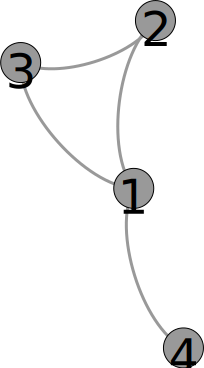

In [22]:
from IPython.core.display import SVG, display

display(SVG(filename='fig-graph.svg'))

In [23]:
graph = {}

In [24]:
graph

{}

In [25]:
graph[1] = [2, 3, 4]

In [26]:
graph

{1: [2, 3, 4]}

In [27]:
graph[2] = [1, 3]

In [28]:
graph[3] = [1, 2]

In [29]:
graph[4] = [1]

In [30]:
graph

{1: [2, 3, 4], 2: [1, 3], 3: [1, 2], 4: [1]}

Now we can loop over the nodes, and extract the edges.

In [31]:
for node in graph:
    print(node, graph[node])

1 [2, 3, 4]
2 [1, 3]
3 [1, 2]
4 [1]


# Homework

A graph has an Eulerian cycle if you can construct a tour that traverses every edge once and returns to the starting vertex. A graph has an Eulerian path if you can start at one node, and traverse every edge once, ending at a different node than the start. Euler showed that these conditions correspond to every node has an even number of edges for a cycle, and every node except exactly 2 odd nodes have an even number of edges for a path.

Our example graph above has an Eulerian path, but not an Eulerian cycle.

Write a function `hasEulerianPath(G)` that returns 1 if graph G has an Eulerian path and 0 if it doesn't.

# References

[1] https://en.wikipedia.org/wiki/Eulerian_path

[2] Neil C. Jones and Pavel A. Pevzner. An Introduction to Bioinformatics Algorithms. The MIT Press, Cambridge, Massachusetts. (2004). ISBN-10: 0-262-10106-8 ISBN-13: 978-0-262-10106-6.
